In [1]:
#Importing Needed Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import pandas as pd
import cufflinks as cf
import yfinance as yf
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
%matplotlib inline

In [2]:
#Reading CSV file as weather_df and making date_time column as index of dataframe
weather_df = pd.read_excel('TataData.xlsx', parse_dates=['Datetime'], index_col='Datetime')
weather_df.head(5)

Batterie (V)  Rayonnement global (j/cm²)  Température (°C)  \
Datetime                                                                 
2012-06-22          6.76                     2728.52             35.10   
2012-06-23          6.76                     1778.98             35.54   
2012-06-24          6.73                     1402.39             34.72   
2012-06-25          6.76                     1907.94             36.30   
2012-06-26          6.76                     2204.78             37.07   

            ETo (mm)  Humidité relative (%)  Précipitation (mm)  \
Datetime                                                          
2012-06-22      7.43                  13.16                 0.0   
2012-06-23      6.64                  12.12                 0.0   
2012-06-24      6.21                  16.95                 0.0   
2012-06-25      6.36                  13.10                 0.0   
2012-06-26      7.34                  13.08                 0.2   

            Vitesse du vent (km/h)  Direction du vent (°)  tempmax  tempmin  \
Datetime                                                                      
2012-06-22                   12.88                 166.57     41.8     23.7   
2012-06-23                   24.33                 125.53     43.9     26.7   
2012-06-24                   18.74                 153.65     40.0     25.8   
2012-06-25                   18.84                 154.63     43.4     29.1   
2012-06-26                   18.36                 181.03     42.3     28.2   

            ...  precip  precipprob  precipcover  windspeed  winddir  \
Datetime    ...                                                        
2012-06-22  ...     0.0           0          0.0       30.6    253.5   
2012-06-23  ...     0.0           0          0.0       25.6    128.5   
2012-06-24  ...     0.0           0          0.0       19.8    122.7   
2012-06-25  ...     0.0           0          0.0       24.1    136.4   
2012-06-26  ...     0.0           0          0.0       24.5    118.8   

            cloudcover  solarradiation  solarenergy  uvindex        conditions  
Datetime                                                                        
2012-06-22         0.0           360.4         31.1       10             Clear  
2012-06-23         4.8           321.3         27.7       10             Clear  
2012-06-24        46.6           234.4         20.2        8  Partially cloudy  
2012-06-25        60.8           290.6         25.2       10  Partially cloudy  
2012-06-26        68.9           229.4         19.9        7  Partially cloudy  

[5 rows x 26 columns]

In [3]:
weather_df.describe()

Batterie (V)  Rayonnement global (j/cm²)  Température (°C)  \
count   3645.000000                 2890.000000       3645.000000   
mean       6.872137                 2012.106471         24.747292   
std        0.125527                  634.179410          8.347116   
min        6.440000                    0.000000          7.300000   
25%        6.790000                 1482.915000         17.310000   
50%        6.860000                 2017.585000         24.460000   
75%        6.960000                 2564.585000         32.250000   
max        7.160000                 3162.170000         41.900000   

          ETo (mm)  Humidité relative (%)  Précipitation (mm)  \
count  3645.000000            3645.000000         3645.000000   
mean      4.700938              12.504310            0.221838   
std       2.451765               8.537735            2.374180   
min       0.000000               1.840000            0.000000   
25%       2.700000               6.630000            0.000000   
50%       4.390000              10.230000            0.000000   
75%       6.570000              15.820000            0.000000   
max      12.140000              82.780000           84.800000   

       Vitesse du vent (km/h)  Direction du vent (°)      tempmax  \
count             3645.000000            2890.000000  3653.000000   
mean                14.061619             175.754765    31.285847   
std                  5.575256              44.996052     8.699604   
min                  3.670000              59.990000     6.900000   
25%                  9.710000             141.210000    23.800000   
50%                 13.390000             172.345000    31.100000   
75%                 17.780000             211.145000    39.200000   
max                 39.080000             274.150000    46.900000   

           tempmin  ...     humidity       precip   precipprob  precipcover  \
count  3653.000000  ...  3653.000000  3653.000000  3653.000000  3653.000000   
mean     16.291185  ...    31.356118     0.325185     9.690665     3.036340   
std       7.715334  ...    14.532989     2.474187    29.587111    12.445926   
min      -1.500000  ...     7.100000     0.000000     0.000000     0.000000   
25%       9.500000  ...    19.800000     0.000000     0.000000     0.000000   
50%      15.800000  ...    29.100000     0.000000     0.000000     0.000000   
75%      22.700000  ...    40.100000     0.000000     0.000000     0.000000   
max      33.400000  ...    87.700000    55.400000   100.000000   100.000000   

         windspeed      winddir   cloudcover  solarradiation  solarenergy  \
count  3653.000000  3653.000000  3653.000000     3653.000000  3653.000000   
mean     25.859923   200.833014    23.397126      260.107446    22.458719   
std       8.294462    87.130450    26.764574       73.651711     6.346451   
min       7.200000    27.100000     0.000000       51.200000     4.400000   
25%      19.400000   124.100000     0.800000      193.600000    16.700000   
50%      25.900000   198.400000    12.300000      265.200000    22.900000   
75%      31.700000   286.400000    39.600000      325.900000    28.200000   
max      58.700000   343.500000    97.700000      392.700000    32.900000   

           uvindex  
count  3653.000000  
mean      8.554065  
std       1.566924  
min       2.000000  
25%       7.000000  
50%       9.000000  
75%      10.000000  
max      10.000000  

[8 rows x 25 columns]

In [4]:
MissingValues = weather_df.isnull()
Sum=MissingValues.sum()
Sum

Batterie (V)                    8
Rayonnement global (j/cm²)    763
Température (°C)                8
ETo (mm)                        8
Humidité relative (%)           8
Précipitation (mm)              8
Vitesse du vent (km/h)          8
Direction du vent (°)         763
tempmax                         0
tempmin                         0
temp                            0
feelslikemax                    0
feelslikemin                    0
feelslike                       0
dew                             0
humidity                        0
precip                          0
precipprob                      0
precipcover                     0
windspeed                       0
winddir                         0
cloudcover                      0
solarradiation                  0
solarenergy                     0
uvindex                         0
conditions                      0
dtype: int64

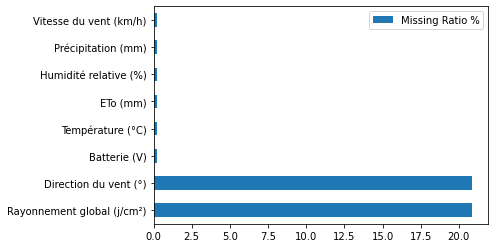

In [5]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [6]:
weather_df['Batterie (V)'].fillna(value=6.872137, inplace=True)
weather_df['Rayonnement global (j/cm²)'].fillna(value=2012.106471, inplace=True)
weather_df['Température (°C)'].fillna(value=24.747292, inplace=True)
weather_df['ETo (mm)'].fillna(value=4.700938, inplace=True)
weather_df['Humidité relative (%)'].fillna(value=12.504310, inplace=True)
weather_df['Précipitation (mm)'].fillna(value=0.221838, inplace=True)
weather_df['Vitesse du vent (km/h)'].fillna(value=14.061619, inplace=True)
weather_df['Direction du vent (°)'].fillna(value=175.754765, inplace=True)

In [7]:
df=weather_df
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

No NAs found


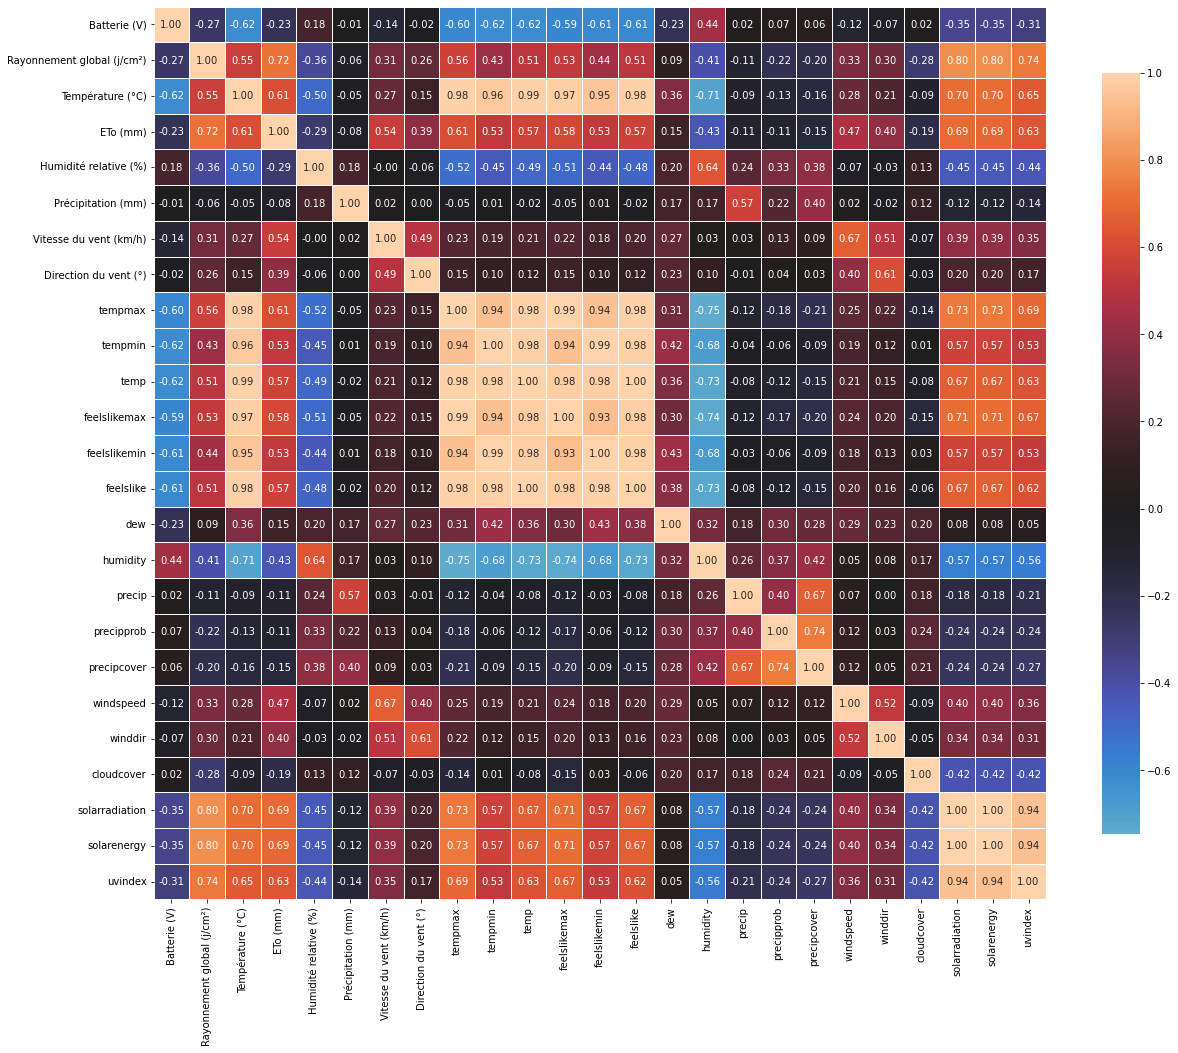

In [8]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(weather_df)

In [9]:
#on remarque que la direction de vent et depend un peut de vitesse de vent et tempurature et rayonnement global
#on va utiliser seulement ces trois parametres pour essayer de predire Temperature

In [46]:
weather_df_num=weather_df.loc[:,['Vitesse du vent (km/h)','windspeed','winddir','solarradiation','solarenergy']]


In [47]:
weather_df_num.head()

Vitesse du vent (km/h)  windspeed  winddir  solarradiation  \
Datetime                                                                 
2012-06-22                   12.88       30.6    253.5           360.4   
2012-06-23                   24.33       25.6    128.5           321.3   
2012-06-24                   18.74       19.8    122.7           234.4   
2012-06-25                   18.84       24.1    136.4           290.6   
2012-06-26                   18.36       24.5    118.8           229.4   

            solarenergy  
Datetime                 
2012-06-22         31.1  
2012-06-23         27.7  
2012-06-24         20.2  
2012-06-25         25.2  
2012-06-26         19.9

In [48]:
#on va tester les 3 modules
#1- Multiple Linear Regression
#2- Decision Tree Regression
#3-  Random Forest Regression

In [49]:
weather_y=weather_df_num.pop("Vitesse du vent (km/h)")
weather_x=weather_df_num
weather_y

Datetime
2012-06-22    12.88
2012-06-23    24.33
2012-06-24    18.74
2012-06-25    18.84
2012-06-26    18.36
              ...  
2022-06-18    13.27
2022-06-19    10.91
2022-06-20    11.98
2022-06-21    34.23
2022-06-22    16.36
Name: Vitesse du vent (km/h), Length: 3653, dtype: float64

In [50]:
#Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.1,random_state=4)

In [51]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [52]:
prediction = model.predict(test_X)

In [53]:
#calculating error
np.mean(np.absolute(prediction-test_y))

3.068338287908412

In [54]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 3.07
R2-score: 0.52


In [55]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

Actual  Prediction  diff
Datetime                            
2020-02-22   13.68       16.01 -2.33
2021-06-02   11.11       20.08 -8.97
2013-05-19   21.91       17.95  3.96
2015-11-23   14.34       13.69  0.65
2013-08-05   13.65       13.05  0.60
...            ...         ...   ...
2018-09-11   17.21       14.58  2.63
2018-05-03   22.57       21.39  1.18
2015-02-26    7.15        7.48 -0.33
2019-04-08   10.70       16.21 -5.51
2015-07-07   17.85       12.64  5.21

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

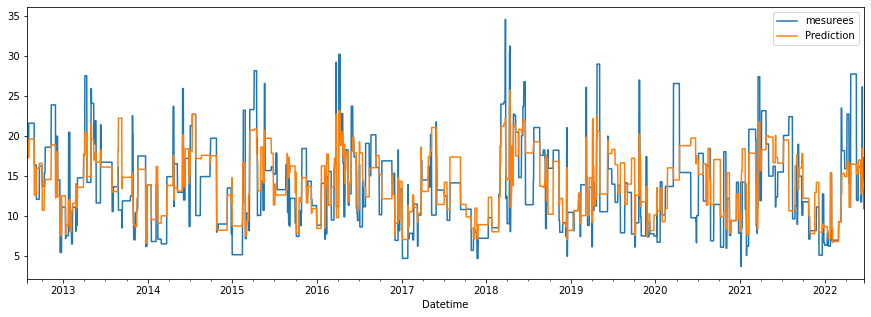

In [56]:
pd.DataFrame({'mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [57]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Multiple Linear Regression ',subplots=False)

In [58]:
#Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [60]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

4.211015352459015

In [61]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.06


In [62]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 4.21
R2-score: 0.06


In [63]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

Actual  Prediction   diff
Datetime                             
2020-02-22   13.68       16.13  -2.45
2021-06-02   11.11       21.36 -10.25
2013-05-19   21.91       14.06   7.85
2015-11-23   14.34       14.44  -0.10
2013-08-05   13.65       11.96   1.69
...            ...         ...    ...
2018-09-11   17.21       24.59  -7.38
2018-05-03   22.57       27.74  -5.17
2015-02-26    7.15       10.92  -3.77
2019-04-08   10.70       19.39  -8.69
2015-07-07   17.85        8.10   9.75

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

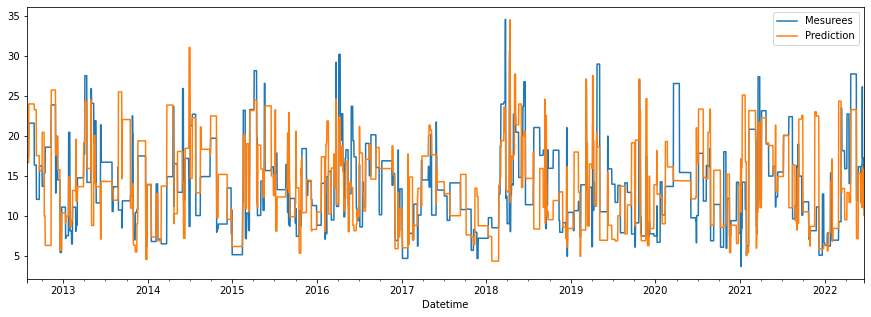

In [64]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [65]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction2})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Decision Tree Regression ',subplots=False)

In [66]:
#Random Forest Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [68]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

2.9188579572677593

In [69]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.56


In [70]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 2.92
R2-score: 0.56


In [71]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

Actual  Prediction  diff
Datetime                            
2020-02-22   13.68       14.20 -0.52
2021-06-02   11.11       17.06 -5.95
2013-05-19   21.91       18.68  3.23
2015-11-23   14.34       12.62  1.72
2013-08-05   13.65       12.53  1.12
...            ...         ...   ...
2018-09-11   17.21       19.13 -1.92
2018-05-03   22.57       21.08  1.49
2015-02-26    7.15       10.28 -3.13
2019-04-08   10.70       15.82 -5.12
2015-07-07   17.85       11.20  6.65

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

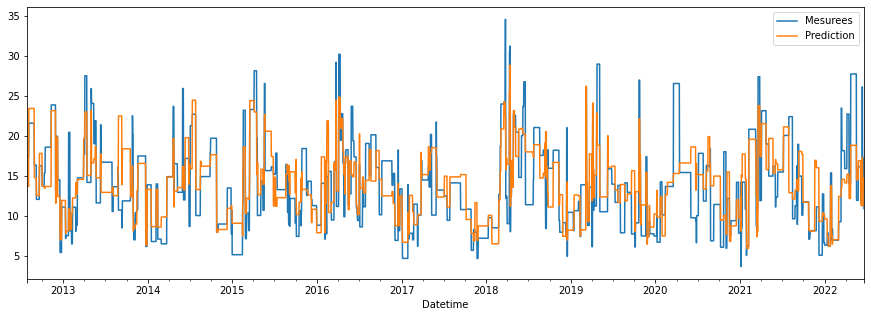

In [72]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [73]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction3})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Random Forest Regression ',subplots=False)

In [74]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 3) # our polynomial model is of order
X_poly = poly_regr.fit_transform(train_X) # transforms the features to the polynomial form
polyReg = LinearRegression() # creates a linear regression object
polyReg.fit(X_poly, train_y) # fits the linear regression object to the polynomial features



LinearRegression()

In [75]:
prediction4=polyReg.predict(poly_regr.fit_transform(test_X))

In [76]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction4 - test_y)))
print("R2-score: %.2f" % r2_score(test_y,prediction4 ) )

Mean absolute error: 2.98
R2-score: 0.54


In [77]:
for i in range(len(prediction4)):
  prediction4[i]=round(prediction4[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction4,'diff':(test_y-prediction4)})

Actual  Prediction  diff
Datetime                            
2020-02-22   13.68       16.34 -2.66
2021-06-02   11.11       18.20 -7.09
2013-05-19   21.91       16.15  5.76
2015-11-23   14.34       13.55  0.79
2013-08-05   13.65       13.87 -0.22
...            ...         ...   ...
2018-09-11   17.21       14.72  2.49
2018-05-03   22.57       21.97  0.60
2015-02-26    7.15        8.57 -1.42
2019-04-08   10.70       14.67 -3.97
2015-07-07   17.85       12.74  5.11

[366 rows x 3 columns]

<AxesSubplot:xlabel='Datetime'>

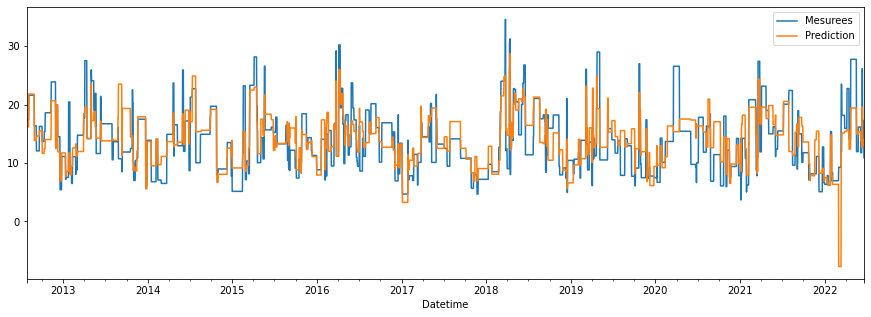

In [78]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').plot(subplots=False, figsize=(15,5))

In [79]:
pd.DataFrame({'Mesurees':test_y,'Prediction':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Polyomial Regression ',subplots=False)

In [87]:
pd.DataFrame({'Valeur réelle':test_y,'MLR Model':prediction,'DTR Model':prediction2,'RFR Model':prediction3,'PR Model':prediction4})['2012':'2022'].resample('D').fillna(method='pad').iplot(title='Comparaison des predictions des modeles avec la valeur reelle mesuree ',subplots=False)

In [80]:
import requests
import json
response_API = requests.get('https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/tata%20maroc?unitGroup=metric&key=VSJTPURWV477GP6K5L8ZX8UWN&contentType=json')
df=response_API.json()
data=df['days']
data

[{'datetime': '2022-06-25',
  'datetimeEpoch': 1656111600,
  'tempmax': 37.2,
  'tempmin': 25.0,
  'temp': 31.0,
  'feelslikemax': 34.4,
  'feelslikemin': 25.0,
  'feelslike': 29.6,
  'dew': 6.9,
  'humidity': 23.4,
  'precip': 0.0,
  'precipprob': 0.0,
  'precipcover': 0.0,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 26.6,
  'windspeed': 16.9,
  'winddir': 257.1,
  'pressure': 1007.0,
  'cloudcover': 0.0,
  'visibility': 24.1,
  'solarradiation': 371.5,
  'solarenergy': 32.1,
  'uvindex': 10.0,
  'severerisk': 10.0,
  'sunrise': '06:33:02',
  'sunriseEpoch': 1656135182,
  'sunset': '20:36:06',
  'sunsetEpoch': 1656185766,
  'moonphase': 0.95,
  'conditions': 'Clear',
  'description': 'Clear conditions throughout the day.',
  'icon': 'clear-day',
  'stations': ['remote'],
  'source': 'comb',
  'hours': [{'datetime': '00:00:00',
    'datetimeEpoch': 1656111600,
    'temp': 28.5,
    'feelslike': 27.2,
    'humidity': 24.7,
    'dew': 6.4,
    'precip': 0.0,
  

In [81]:
datetime=np.array([])
windspeed=np.array([])
winddir=np.array([])
solarradiation=np.array([])
solarenergy=np.array([])
#'Vitesse du vent (km/h)','windspeed','winddir','solarradiation','solarenergy'
#Vitesse du vent (km/h)','windspeed','winddir','solarradiation','solarenergy','uvindex
for i in range(len(data)):
    datetime=np.append(datetime, data[i]['datetime'])
    windspeed=np.append(windspeed, data[i]['windspeed'])
    winddir=np.append(winddir, data[i]['winddir'])
    solarradiation=np.append(solarradiation, data[i]['solarradiation'])
    solarenergy=np.append(solarenergy, data[i]['solarenergy'])


In [82]:
xc=pd.DataFrame({'datetime':datetime,'windspeed':windspeed,'winddir':winddir,'solarradiation':solarradiation,'solarenergy':solarenergy})

In [83]:
xc.set_index(['datetime'],inplace = True)
xc

windspeed  winddir  solarradiation  solarenergy
datetime                                                   
2022-06-25       16.9    257.1           371.5         32.1
2022-06-26       18.4    253.9           367.9         31.8
2022-06-27       20.2    210.2           365.9         31.8
2022-06-28       19.1    134.7           366.8         31.8
2022-06-29       17.3    212.5           384.2         33.0
2022-06-30       18.0    260.0           361.7         31.1
2022-07-01       19.4    230.5           368.2         32.2
2022-07-02       23.8    138.6           373.0         32.2
2022-07-03       20.5    239.3           367.2         31.8
2022-07-04       27.7    261.8           363.5         31.4
2022-07-05       22.0    270.3           363.3         31.4
2022-07-06       18.0    222.6           353.5         30.6
2022-07-07       21.2    216.5           312.3         27.1
2022-07-08       27.0    240.7           365.6         31.5
2022-07-09       19.1    175.2           365.0         31.7

In [84]:
prediction11 = model.predict(xc)
prediction22=regressor.predict(xc)
prediction33=regr.predict(xc)
prediction44=polyReg.predict(poly_regr.fit_transform(xc))

In [85]:
for i in range(len(prediction11)):
  prediction11[i]=round(prediction11[i],2)

for i in range(len(prediction22)):
  prediction22[i]=round(prediction22[i],2)

for i in range(len(prediction33)):
  prediction33[i]=round(prediction33[i],2)

for i in range(len(prediction44)):
  prediction44[i]=round(prediction44[i],2)

Predictions=pd.DataFrame({'datetime':datetime,'API VisualCrossing':windspeed,'MLR Model':prediction11,'DTR Model':prediction22,'RFR Model':prediction33,'PR Model':prediction44})
Predictions.set_index(['datetime'],inplace = True)
Predictions

API VisualCrossing  MLR Model  DTR Model  RFR Model  PR Model
datetime                                                                 
2022-06-25                16.9      12.73      15.47      12.78     13.28
2022-06-26                18.4      13.17      15.47      13.28     13.23
2022-06-27                20.2      13.16      16.22      12.29     13.01
2022-06-28                19.1      11.87       8.22      13.99     12.38
2022-06-29                17.3      12.49      13.27      12.59     11.31
2022-06-30                18.0      13.11      15.15      12.55     12.99
2022-07-01                19.4      13.10      11.05      11.10     13.87
2022-07-02                23.8      13.64      15.29      13.20     13.24
2022-07-03                20.5      13.68      11.58      11.45     13.11
2022-07-04                27.7      16.44      19.60      13.26     14.64
2022-07-05                22.0      14.58       9.27      17.40     14.07
2022-07-06                18.0      12.49      11.51      10.31     12.79
2022-07-07                21.2      13.13      13.08      12.16     12.93
2022-07-08                27.0      15.98      12.66      11.25     13.85
2022-07-09                19.1      12.34      13.44      13.17     12.74

In [86]:
Predictions.fillna(method='pad').iplot(title='Comparaison des predictions',subplots=False)